## Problem Statement

As a Data Scientist at ABC Estate Wines, you have been assigned to analyze and forecast the sales of different types of wine in the 20th century. The dataset comprises sales data from the same company but for different wines. The objective is to gain insights into historical sales patterns and use this information to make accurate forecasts for future wine sales. By leveraging analytical techniques and forecasting models, you should provide valuable insights and predictions that can help ABC Estate Wines make informed decisions and effectively manage their wine sales in the coming years.

## Importing necessary libraries

In [ ]:
from statsmodels.tsa.arima.model import ARIMA as ar
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import statsmodels as st
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
#import plotly.offline as py

%matplotlib inline
import seaborn as sns
from pylab import rcParams

## Loading the dataset

In [ ]:
data = pd.read_csv("/content/Sparkling.csv")
data.head(5) #sh the first 5 rows of data

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [ ]:
data.tail(5) #show the last 5 rows of data

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


## Data Overview

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


1. The data has 2 columns ("YearMonth and Sparkling").
2. YearMonth is an object data type
2. Sparkling is of type int64

The Sparkling column has 187 items
The mean is 2402
The Maximum value is 7242 and the minimum is 1070

In [ ]:
#Check if any null value in present
data.isnull().any()

,0
YearMonth,False
Sparkling,False


There are no null values in any of the columns of the dataset

Plotting the Data

**Sales Data of Sparkling Wines:**

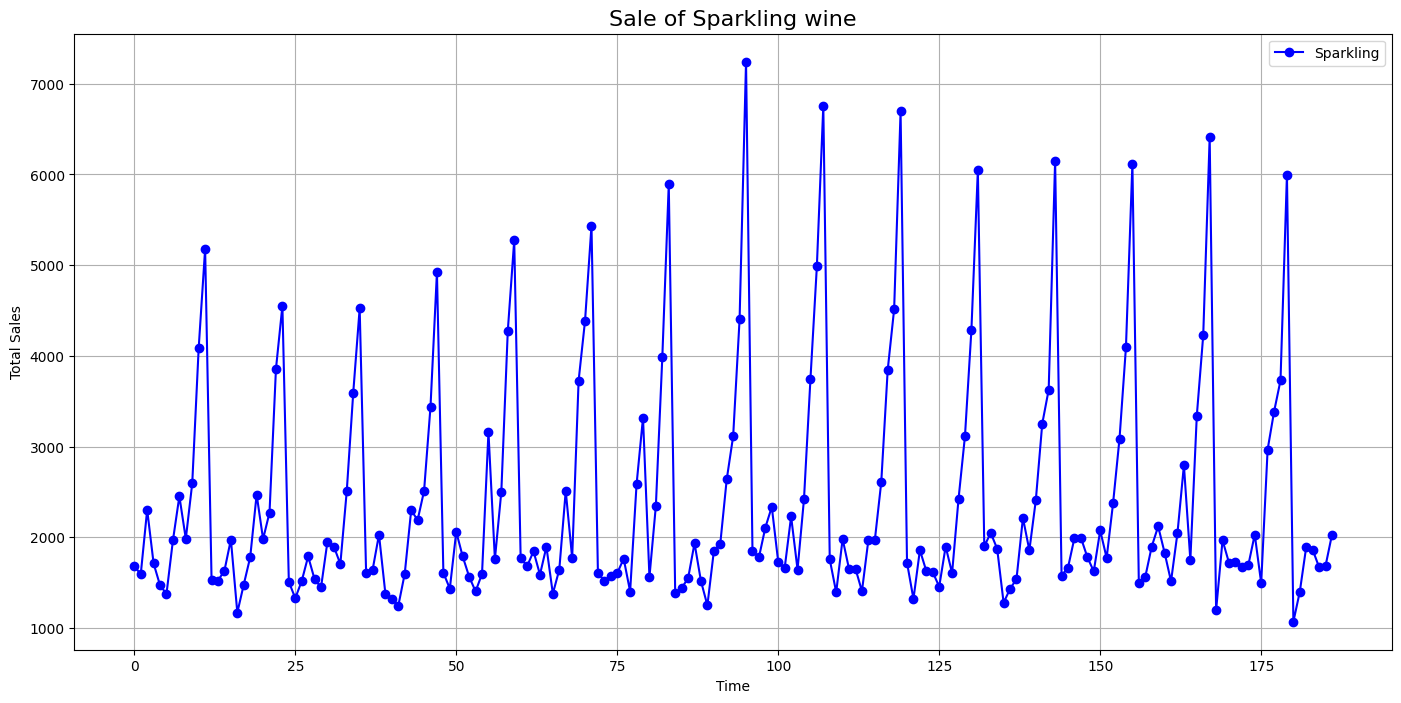

In [ ]:
printmd('**Sales Data of Sparkling Wines:**')
data.plot(marker = "o",figsize=(17, 8),color='blue')
plt.title('Sale of Sparkling wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid();
plt.show()

Average sales per month

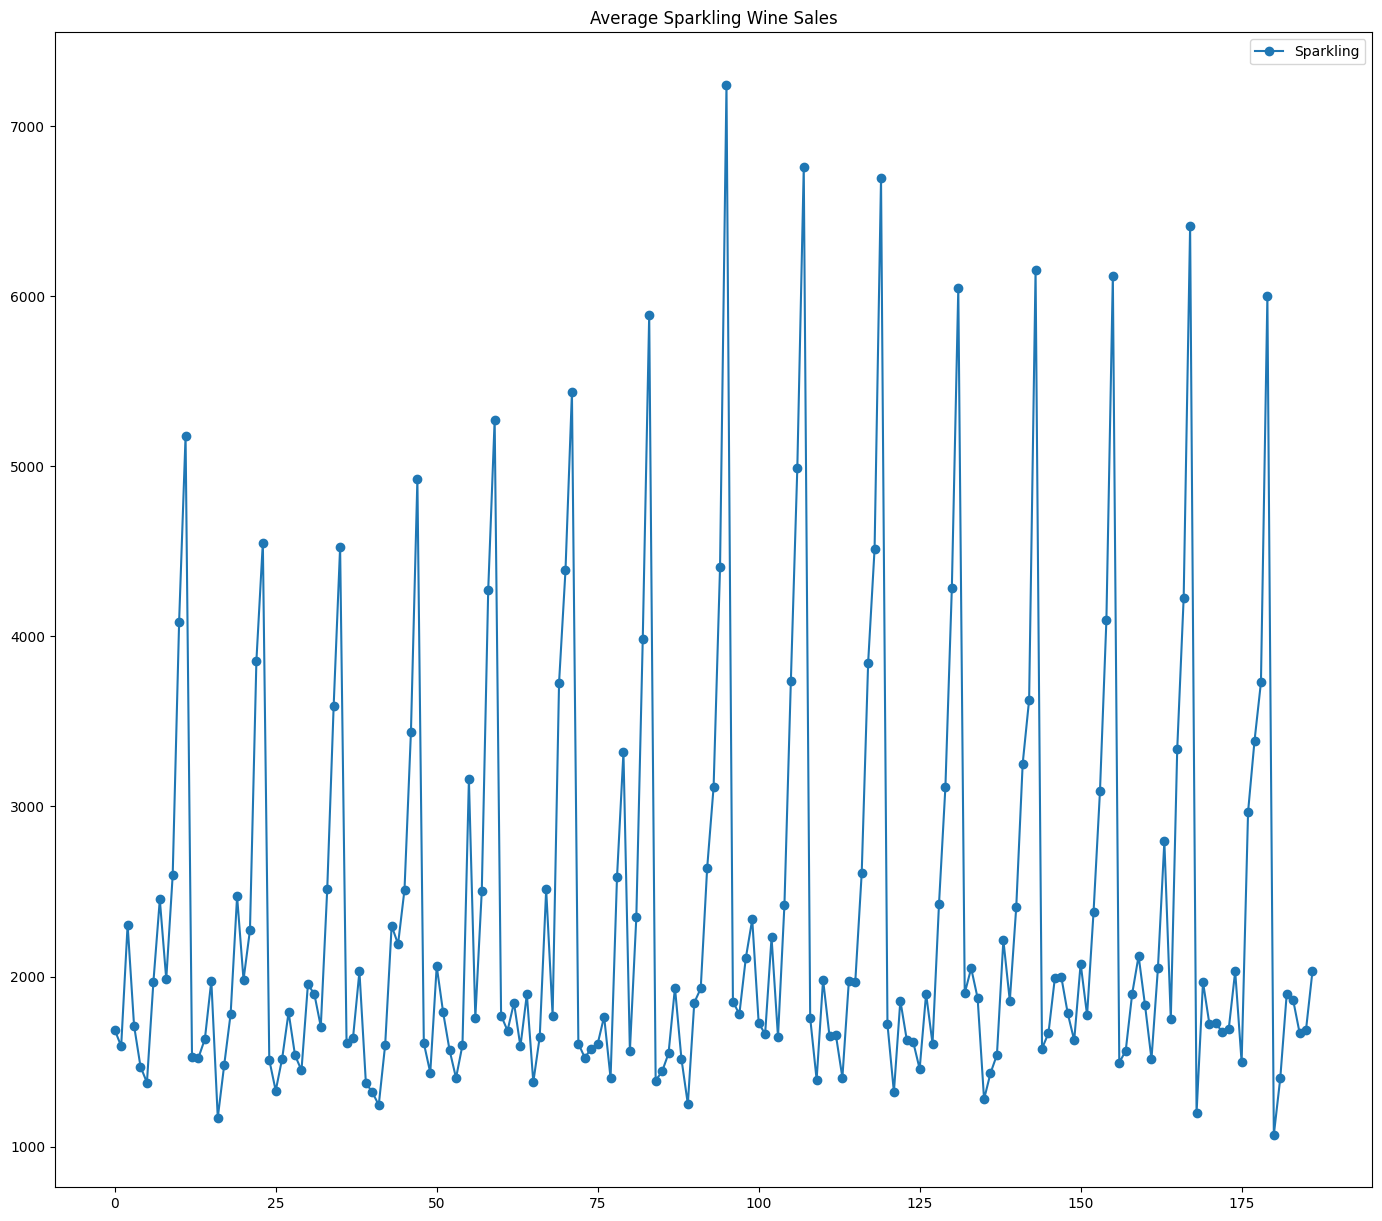

In [ ]:
average_s= data.groupby(data.index)['Sparkling'].mean()
plt.figure(figsize=(17,15))
ax = average_s.plot(legend=True,marker='o',title="Average Sparkling Wine Sales")
plt.legend(loc ='best');

Convert/split the date into months and years.

In [ ]:
dates = pd.date_range(start='1980-01', freq='MS', periods=len(data))

In [ ]:
import calendar
data['Months'] = dates.month
data['Months'] = data['Months'].apply(lambda x: calendar.month_abbr[x]) #splitting into english month names
data['Years'] = dates.year

In [ ]:
data.head(5)

,YearMonth,Sparkling,Months,Years
0,1980-01,1686,Jan,1980
1,1980-02,1591,Feb,1980
2,1980-03,2304,Mar,1980
3,1980-04,1712,Apr,1980
4,1980-05,1471,May,1980


In [ ]:
#Delete the YearMonth column and name the Month and Year column. Rename the Sparkling column to Wine-Sales
data.rename(columns={'Sparkling':'Wine-Sales'}, inplace=True)
data = data[['Months', 'Years', 'Wine-Sales']]

In [ ]:
#View the data
data.head(5)

,Months,Years,Wine-Sales
0,Jan,1980,1686
1,Feb,1980,1591
2,Mar,1980,2304
3,Apr,1980,1712
4,May,1980,1471


In [ ]:
#set the date as the index
data.set_index(dates, inplace=True)

In [ ]:
#View the data
data.head(5)

,Months,Years,Wine-Sales
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471


# Exploratory Data Analysis (EDA)

In [ ]:
printmd('**Data Description for Sparkling Dataset:**')
data.describe()

**Data Description for Sparkling Dataset:**

,Years,Wine-Sales
count,187.000000,187.000000
mean,1987.299465,2402.417112
std,4.514749,1295.111540
min,1980.000000,1070.000000
25%,1983.000000,1605.000000
50%,1987.000000,1874.000000
75%,1991.000000,2549.000000
max,1995.000000,7242.000000


**Yearly Boxplot for Sparkling Dataset:**

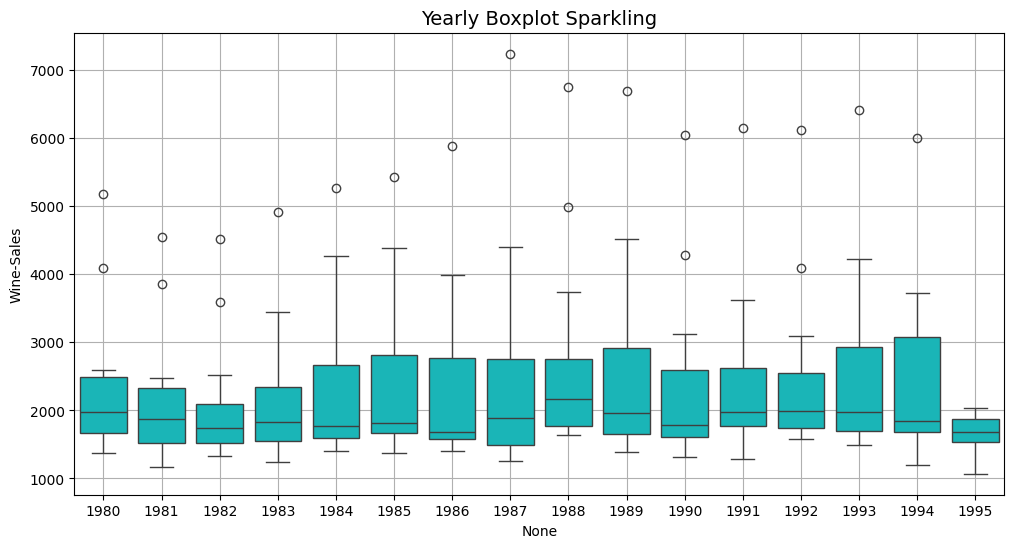

In [ ]:
#yearly boxplot
printmd('**Yearly Boxplot for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = data.index.year,y = data['Wine-Sales'], color = 'darkturquoise')
plt.title('Yearly Boxplot Sparkling', fontsize=14)
plt.grid()
plt.show()

**Monthly Boxplot for all the years for sparkling Dataset:**

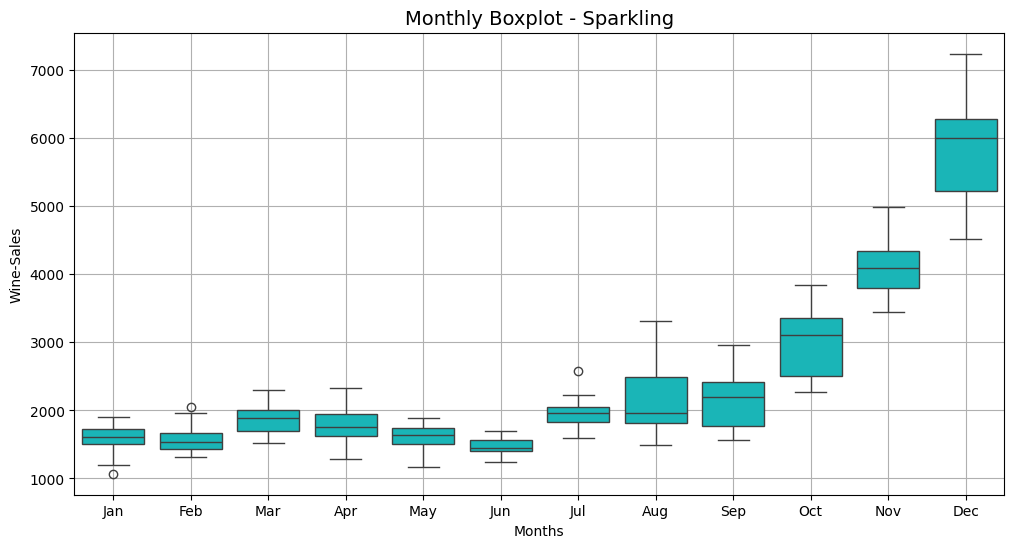

In [ ]:
#monthly boxplot
printmd('**Monthly Boxplot for all the years for sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = data['Months'],y = data['Wine-Sales'], color='darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)
plt.grid()
plt.show()

Monthly Boxplot for all the years for sparkling Dataset have been within the same range depicting seasonality

Monthly and Yearly Plot

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] =  15,7

Text(0.5, 1.0, 'Sparkling - Monthly plot')

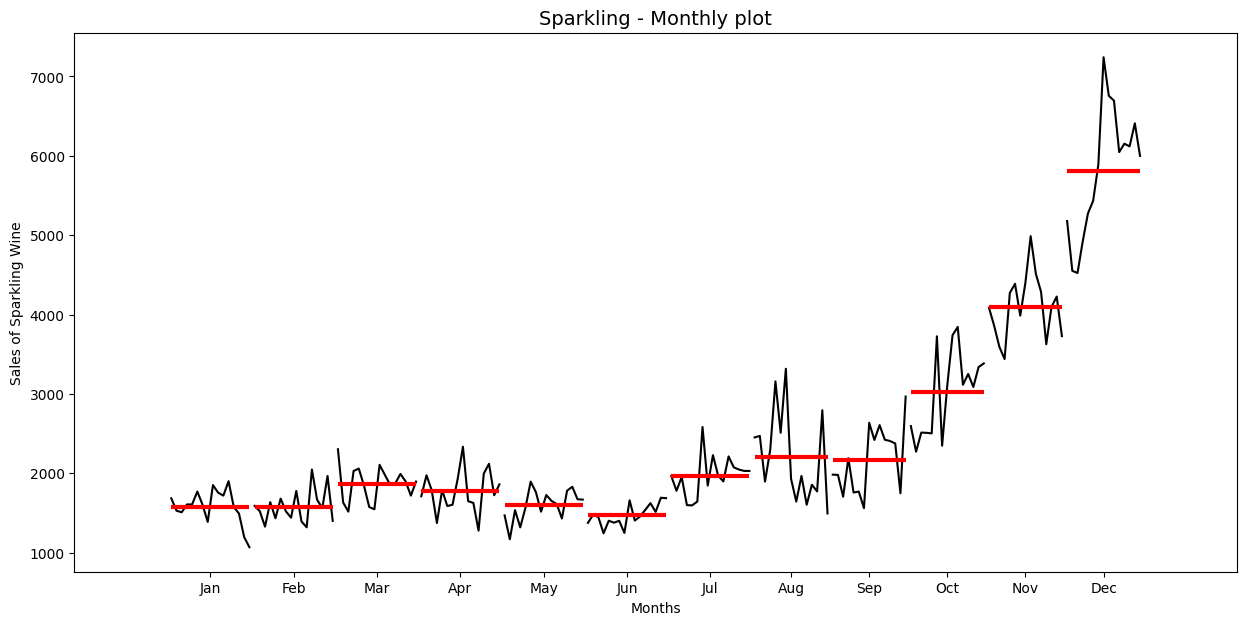

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(data['Wine-Sales'],ylabel='Sales of Sparkling Wine')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

Distribution

Text(0, 0.5, 'Distribution')

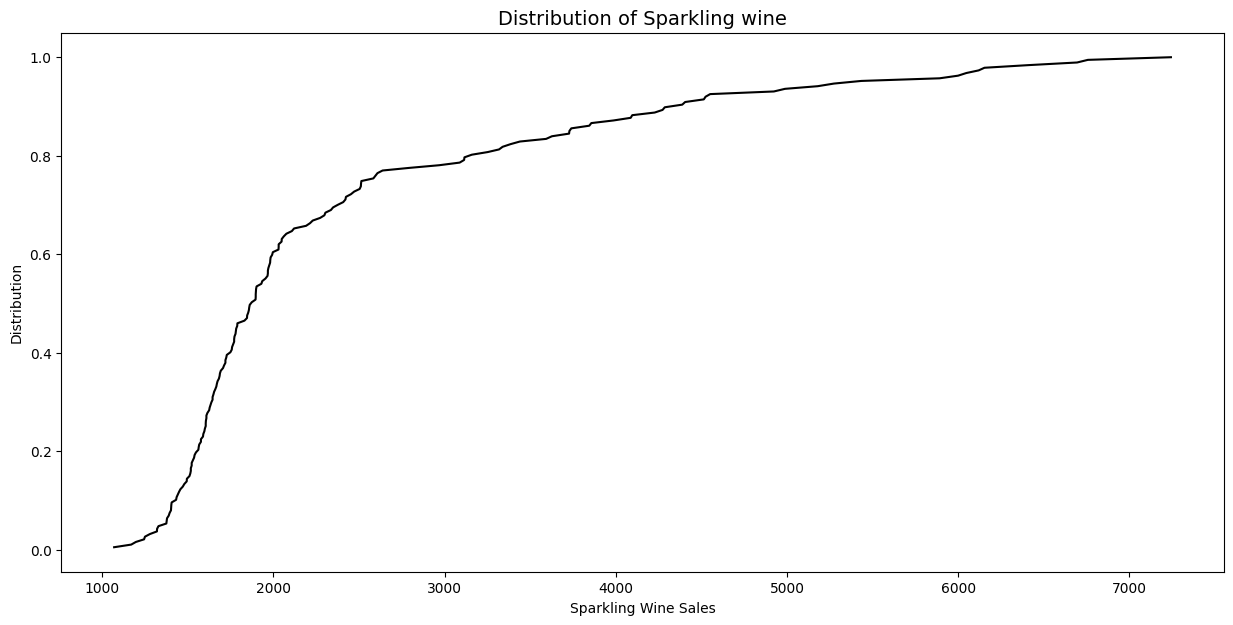

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (15, 7))
cdf = ECDF(data['Wine-Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'BLACK')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sparkling Wine Sales')
plt.ylabel('Distribution')

Checking for Stationality using Dicker Fuller Test

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

    Null Hypothesis H0: Time Series is non-stationary.
    Alternate Hypothesis Ha: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .

In [ ]:
# extract out the time-series
sales_wn = data['Wine-Sales']

In [ ]:
dftest = adfuller(sales_wn)#python implementation of dicky fuller test
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


p-value is greater that 0.05. We cannot reject the null hypotheses. The time series is non-stationary

In [ ]:
#We generate a pivot table of the data for monthly sales data
monthly_sales_data = pd.pivot_table(data, values = "Wine-Sales", columns = "Years", index = "Months")
monthly_sales_data


Years,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Months,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [ ]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Years,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Months,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


The table shows how monthly sales vary on a month on month basis

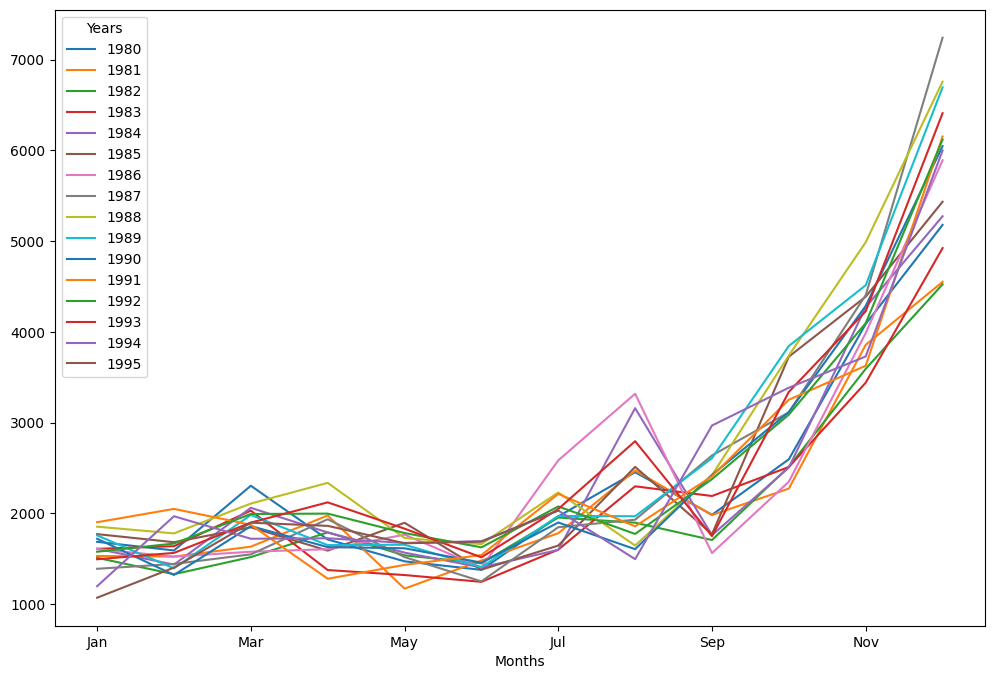

In [ ]:
#We plot the monthly sales data
monthly_sales_data.plot(figsize = (12, 8))
plt.show()

The sales are low in the month of January through September when it starts rising reaching its peak in December.

The data displays seasonality across all the years.


In [ ]:
#Pivot table for Yearly sales data
yearly_sales_data = pd.pivot_table(data, values = "Wine-Sales", columns = "Months", index = "Years")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Years,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


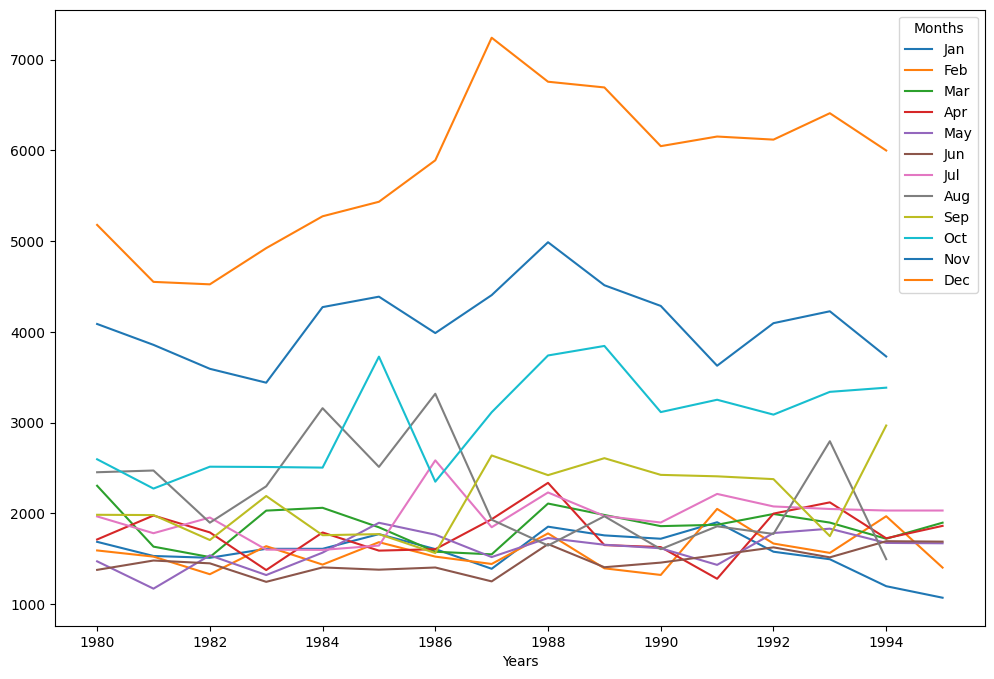

In [ ]:
#Plot Yearly Sales data
yearly_sales_data.plot(figsize = (12, 8))
plt.show()

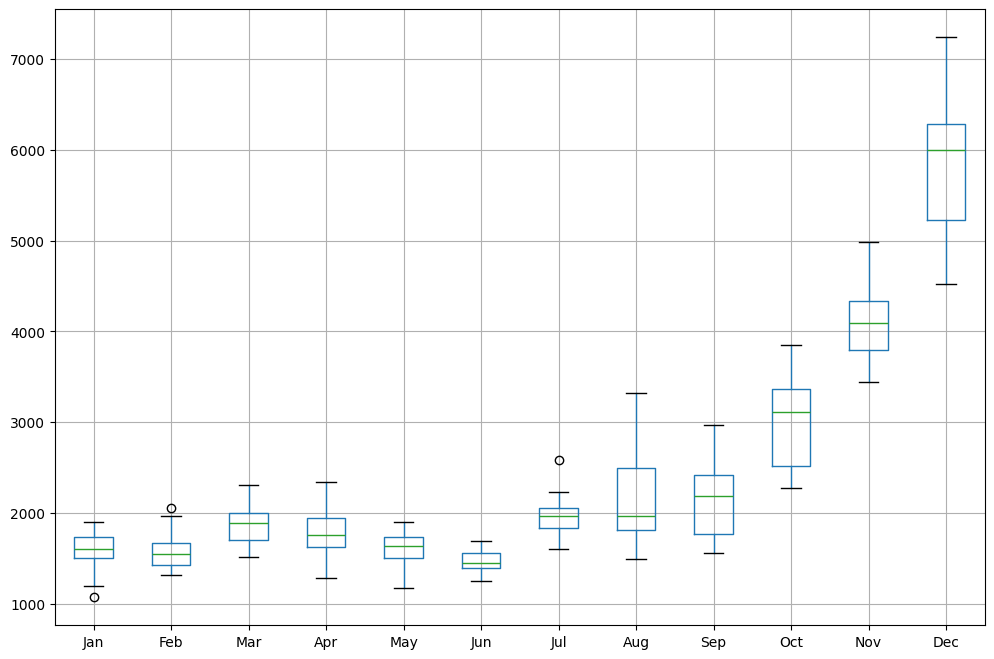

In [ ]:
#Generate a Box plot for the yearly data
yearly_sales_data.boxplot(figsize = (12, 8))
plt.show()
#yearly_sales_data.boxplot(figsize = (12, 8))
#insert legend for the years
#plt.legend(loc = 'best')
#plt.show()

*   Sales have been increasing every year
*   October -December are the peak sales months for the year
*   Variance & Mean values in the above 3 months are also higher than any of the other months.
*   12 months seasonal cycle is present as mean of each month year on year starts with an low trend in the beginning of the year and increases towards the end of the year.


### **Time Series Decomposistion**

## Data Preparation for Modeling


Extract the time-series and plot it, and provide the inferences accordingly.

In [ ]:
# extract out the time-series
sales_wn = data['Wine-Sales']

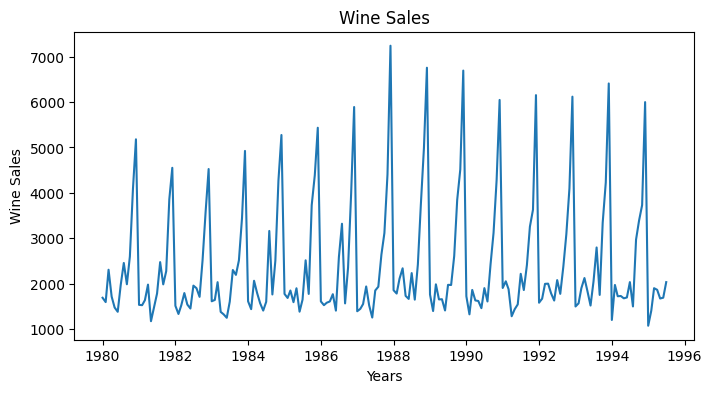

In [ ]:
#Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(sales_wn)
plt.xlabel('Years')
plt.ylabel('Wine Sales')
plt.title('Wine Sales')
plt.show()

1. Additive Decomposition

In [ ]:
decomposition = sm.tsa.seasonal_decompose(sales_wn, model='additive')

**Decomposition of Sparkling Time Series with additive Seasonality:**

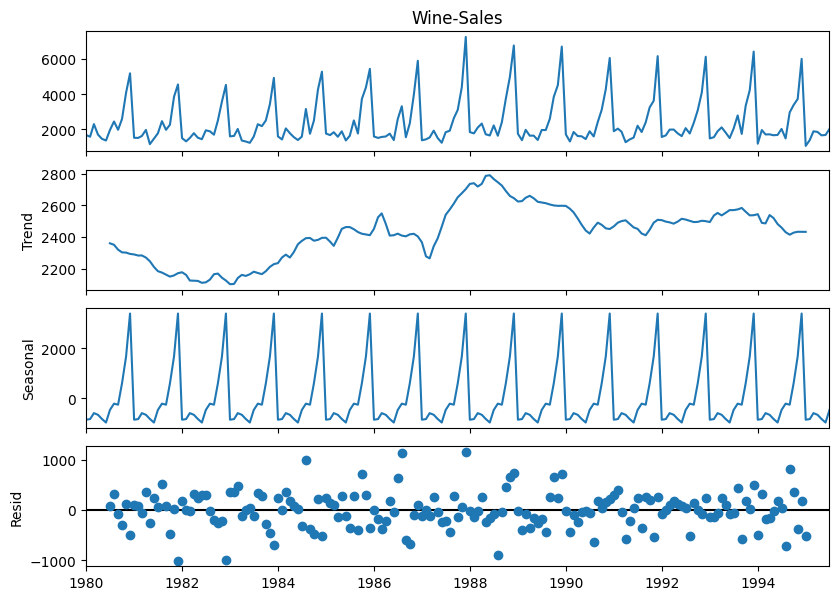

In [ ]:
#We display the decomposition components
printmd('**Decomposition of Sparkling Time Series with additive Seasonality:**')
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
plt.show()

The residue variations are too high in the range of -1000 to 1000.This model is not a good fit.

2. Multiplicative Decomposition

In [ ]:
#we do  multiplicative decomposition
decomposition = sm.tsa.seasonal_decompose(sales_wn, model='multiplicative')

**Decomposition of Sparkling Time Series with multiplicative Seasonality:**

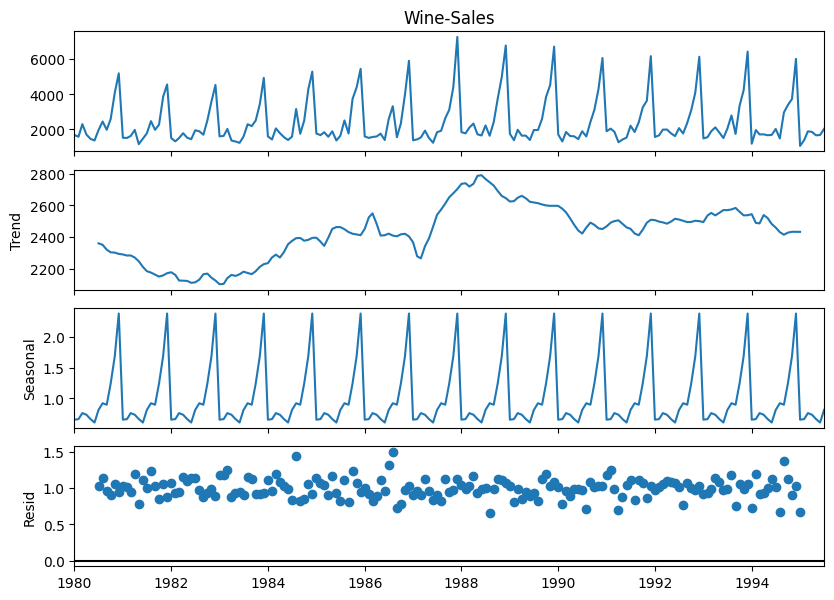

In [ ]:
#disply the components
printmd('**Decomposition of Sparkling Time Series with multiplicative Seasonality:**')
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
plt.show()


Some of our key observations from this analysis:


*   Trend: 12-months MA is a fairly straight line indicating a linear trend.
*   Seasonality: seasonality of 12 months is clearly visible
*   Irregular Remainder (random): The multiplicative model works as there are no patterns in the residuals. The model has less residue within the range of 1.


# **Data Preparation for Modeling**

1. Split Data to Train and Test set

In [ ]:
#Determine split index (80% train, 20% test)
split_index = int(len(data) * 0.8)

In [ ]:
## Split the data
train = data.iloc[:split_index]
test = data.iloc[split_index:]

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (149, 3)
Test shape: (38, 3)


In [ ]:
#display the range of Train and test set
print("\nTrain range:", train.index.min(), "→", train.index.max())
print("Test range:", test.index.min(), "→", test.index.max())


Train range: 1980-01-01 00:00:00 → 1992-05-01 00:00:00
Test range: 1992-06-01 00:00:00 → 1995-07-01 00:00:00


Plot the train and test sets in one plot

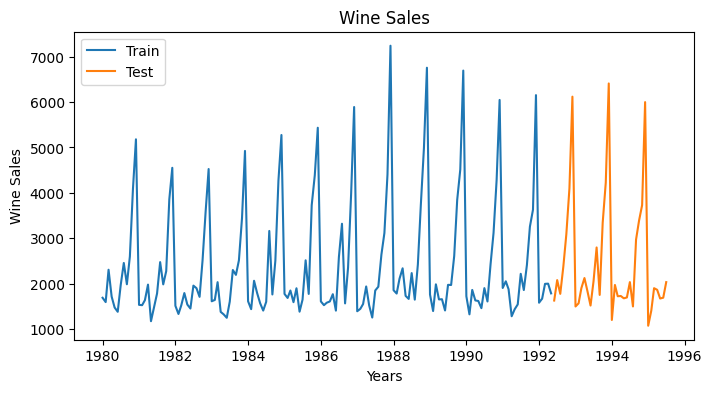

In [ ]:
#Plot the train and test data sets
plt.figure(figsize=(8, 4))
plt.plot(train['Wine-Sales'], label='Train')
plt.plot(test['Wine-Sales'], label='Test')
plt.xlabel('Years')
plt.ylabel('Wine Sales')
plt.title('Wine Sales')
plt.legend()

# **Model Building**

2. Define the Model Parameters

In [ ]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

3. Define parameters (p, d, q) estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models

In [ ]:
# Define the d parameter
d= range(0,2)

In [ ]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [ ]:
#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

In [ ]:
#Generate all different combinations of p with d=0 and q=0 triplets for Naive Forecast model building
pdq_nf = list(itertools.product(range(1),d, range(1)))

In [ ]:
#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

In [ ]:
#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

In [ ]:
# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

4. Display the values of these parameters

In [ ]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [ ]:
pdq_nf

[(0, 0, 0), (0, 1, 0)]

In [ ]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [ ]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [ ]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

Since the time series shows non-constant variance (heteroscedasticity) we apply applying a log transformation

In [ ]:
sales_wn_log = np.log10(train['Wine-Sales'])

In [ ]:
#Initialise AIC search variables
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

### **1. AR Model**

Autoregressive models use previous time period values to predict the current time period values.

AR Model building to estimate best 'p' ( Lowest AIC Approach )

In [ ]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(sales_wn_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = pd.concat([AR_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(1, 0, 0) - AIC:-107.39954617264593
ARIMA(2, 0, 0) - AIC:-111.26487552370497
ARIMA(3, 0, 0) - AIC:-109.4219315075768


Building AR model with the best 'p' Paramenter

In [ ]:
best_model = ARIMA(sales_wn_log,order = (2,0,0))#p=2 with lowest AIC
best_results = best_model.fit()

In [ ]:
#Print the results table
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  59.632
Date:                Thu, 30 Oct 2025   AIC                           -111.265
Time:                        17:53:36   BIC                            -99.249
Sample:                    01-01-1980   HQIC                          -106.383
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3321      0.030    111.573      0.000       3.274       3.391
ar.L1          0.5410      0.118      4.580      0.000       0.309       0.772
ar.L2         -0.1956      0.146     -1.340      0.1

Calculating RMSE for best AR model

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1970.158651
1992-07-01,2126.097507
1992-08-01,2172.693966
1992-09-01,2165.807109
1992-10-01,2152.939558
1992-11-01,2147.343794
1992-12-01,2146.824062
1993-01-01,2147.636172
1993-02-01,2148.177361
1993-03-01,2148.311217


In [ ]:
# Compute the root mean square error
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1363.231


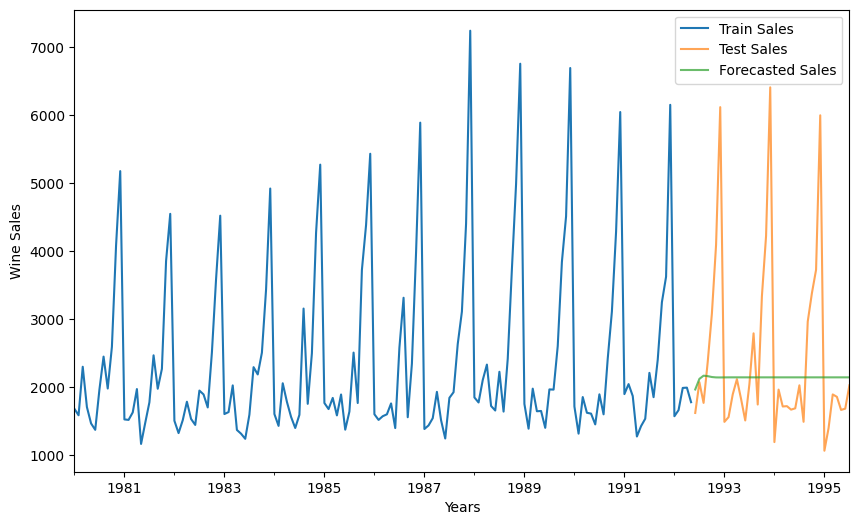

In [ ]:
#We plot the forecats against the actual test values
axis = train['Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
#add results to the resultsDf dataframe
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf


,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715


### **2. Naive Forecast Model**

A Naïve Forecast assumes that the most recent observed value is the best predictor for all future values.



In [ ]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_nf:
    ARIMA_model = ARIMA(sales_wn_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = pd.concat([AR_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 0, 0) - AIC:-75.19773834395922
ARIMA(0, 1, 0) - AIC:-62.961280390249726


Building AR model with the best 'd' Paramenter

In [ ]:
best_model = ARIMA(sales_wn_log,order = (0,1,0))#p=2 with lowest AIC
best_results = best_model.fit()

In [ ]:
#print results tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  32.481
Date:                Thu, 30 Oct 2025   AIC                            -62.961
Time:                        17:53:37   BIC                            -59.964
Sample:                    01-01-1980   HQIC                           -61.744
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0377      0.003     12.779      0.000       0.032       0.044


In [ ]:
#Do the prediction
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
#Do the forecast
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)
#

In [ ]:
#display forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1783.0
1992-07-01,1783.0
1992-08-01,1783.0
1992-09-01,1783.0
1992-10-01,1783.0
1992-11-01,1783.0
1992-12-01,1783.0
1993-01-01,1783.0
1993-02-01,1783.0
1993-03-01,1783.0


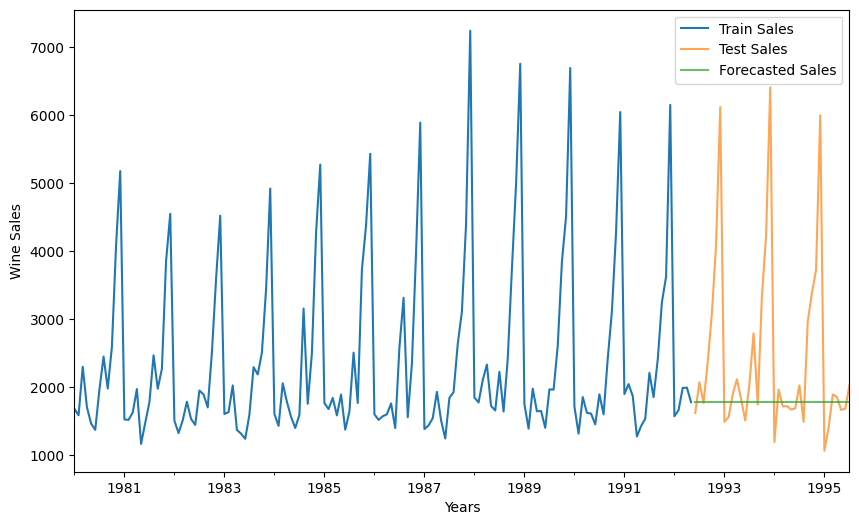

In [ ]:
#We plot the forecats against the actual test values
axis = train['Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
# Compute the root mean square error
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1490.207


In [ ]:
#add results to the resultsDf dataframe
resultsDf1 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best Naive Forecast : ARIMA(0,1,0)'])

resultsDf1
pd.concat([resultsDf,resultsDf1])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448


A very small difference between the RMSE of AR and Naive Forecast models above 1363 versus 1364

### **3. Simple Average**

A Simple Average Forecast predicts all future values as the mean of all past observations.

A Simple Average forecast is not exactly an ARIMA model, but it can be approximated or implemented under the ARIMA framework as a constant-mean model:

Yt=μ+ϵt
Y
t
	​

=μ+ϵ
t
	​


This is equivalent to an ARIMA(0,0,0) model — also known as the white noise model with a constant mean.

In [ ]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_nf:
    ARIMA_model = ARIMA(sales_wn_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = pd.concat([AR_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 0, 0) - AIC:-75.19773834395922
ARIMA(0, 1, 0) - AIC:-62.961280390249726


Building Simple Average model

The Simple Average modelis equivalent to an ARIMA(0,0,0) model

In [ ]:
best_model = ARIMA(sales_wn_log,order = (0,0,0))#p=2 with lowest AIC
best_results = best_model.fit()

In [ ]:
#print result tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                          ARIMA   Log Likelihood                  39.599
Date:                Thu, 30 Oct 2025   AIC                            -75.198
Time:                        17:53:37   BIC                            -69.190
Sample:                    01-01-1980   HQIC                           -72.757
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3324      0.022    149.090      0.000       3.289       3.376
sigma2         0.0344      0.006      6.247      0.000       0.024       0.045


In [ ]:
#do the prediction
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
#Forecast for the test period
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [ ]:
#extract the predicted and the true values of the time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
#disply the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,2149.873034
1992-07-01,2149.873034
1992-08-01,2149.873034
1992-09-01,2149.873034
1992-10-01,2149.873034
1992-11-01,2149.873034
1992-12-01,2149.873034
1993-01-01,2149.873034
1993-02-01,2149.873034
1993-03-01,2149.873034


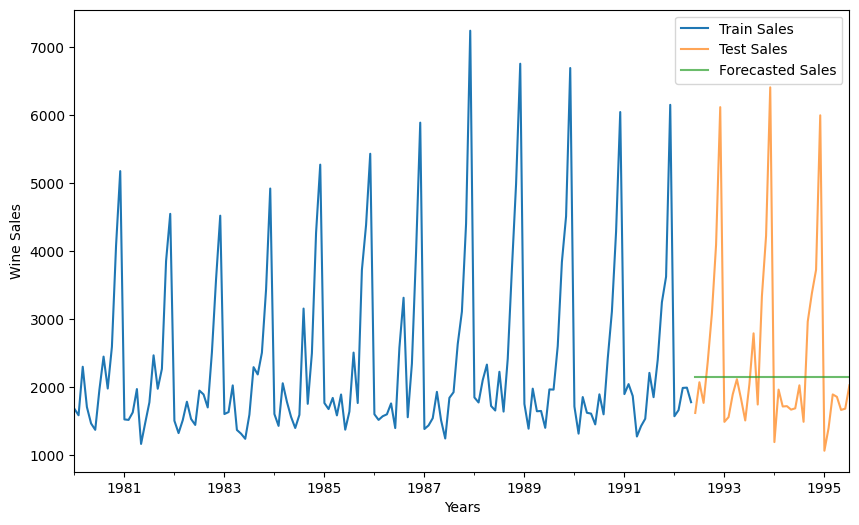

In [ ]:
#plot the forescated values against the actual test values
axis = train['Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
# Compute the root mean square error
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))


The Root Mean Squared Error of our forecasts is 1364.22


In [ ]:
#add the RMSE values to the results dataframe
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best Simple Average : ARIMA(0,0,0)'])

resultsDf2
pd.concat([resultsDf,resultsDf1,resultsDf2])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460


### **4. Simple Exponential Smoothing - SES**

Simple Exponential Smoothing (SES) is a forecasting method for time series without trend or seasonality.

It assumes the series fluctuates around a constant mean (level) and that recent observations should get more weight than older ones.

The “exponential” part comes from how older data’s influence decays exponentially — not linearly — as we go back in time.

A Simple Exponential Smoothing model is mathematically equivalent to an ARIMA(0,1,1) model becaus eof the following:

*  SES produces forecasts that are weighted averages of past observations.
*  When estimated properly, both yield identical forecasts.
*   ARIMA(0,1,1) produces forecasts that are weighted averages of past forecast errors.




In [ ]:
#Create an empty dataframe to store the results
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC




Building Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) is equivalent to an ARIMA(0,1,1) model


In [ ]:
#Building Simple Exponential Smoothing (SES) which is equivalent to an ARIMA(0,1,1) model
from statsmodels.tsa.arima.model import ARIMA
best_model = ARIMA(sales_wn_log,order = (0,1,1))
best_results = best_model.fit()

In [ ]:
#print best results tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  35.259
Date:                Thu, 30 Oct 2025   AIC                            -66.517
Time:                        17:53:38   BIC                            -60.523
Sample:                    01-01-1980   HQIC                           -64.082
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2909      0.090     -3.222      0.001      -0.468      -0.114
sigma2         0.0363      0.005      7.427      0.000       0.027       0.046


In [ ]:
#Do the predictions
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)



In [ ]:
#forecast for the test period
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)


In [ ]:
#extract the predicted and the true values of the time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

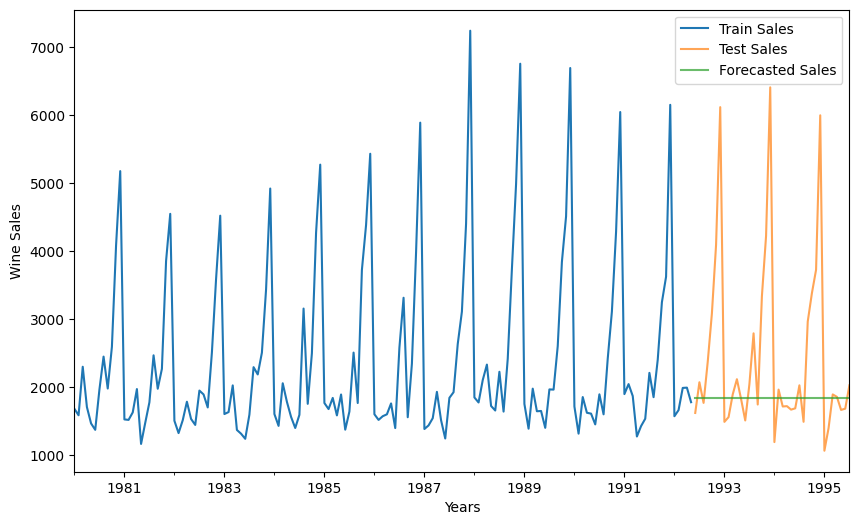

In [ ]:
#plot the forescated values against the actual test values
axis = train['Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
#display the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1838.195233
1992-07-01,1838.195233
1992-08-01,1838.195233
1992-09-01,1838.195233
1992-10-01,1838.195233
1992-11-01,1838.195233
1992-12-01,1838.195233
1993-01-01,1838.195233
1993-02-01,1838.195233
1993-03-01,1838.195233


In [ ]:
#compute the root mean square
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1466.087


In [ ]:
#add the RMSE values to the results dataframe
resultsDf3 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best Simple Exponential Smoothing : ARIMA(0,1,1)'])

resultsDf3
pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956


### **5. Double Exponential Smoothing (DES)**

Double Exponential Smoothing (DES), also known as Holt's Linear Trend method, is a time series forecasting technique designed for data that exhibits a trend (a long-term increase or decrease) but no significant seasonality.

It extends the basic Simple Exponential Smoothing method by incorporating a second component to explicitly model the trend.

Key Components and Equations

The method operates using three main equations that are updated at each time step, and it utilizes two smoothing parameters to control the influence of recent data.

Component	Description	Smoothing Parameter

*   Level (ℓt​)	The estimated average value of the series at time t.	Alpha (α)
*   Trend (bt​)	The estimated slope (rate of change) of the series at time t.	Beta (β or β∗)
*   Forecast ($\hat{y}_{t+h	t}$)	The prediction for h periods into the future.

Double Exponential Smoothing corresponds to ARIMA(0,2,2)

In [ ]:
#prepare a dataframe to store results
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [ ]:
#Building Double Exponential Smoothing (DES) model which is equivalent to an ARIMA(0,2,2) model
from statsmodels.tsa.arima.model import ARIMA
best_model = ARIMA(sales_wn_log,order = (0,2,2))
best_results = best_model.fit()

In [ ]:
#Printing result tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  31.696
Date:                Thu, 30 Oct 2025   AIC                            -57.393
Time:                        17:53:39   BIC                            -48.421
Sample:                    01-01-1980   HQIC                           -53.748
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2708    139.860     -0.009      0.993    -275.392     272.850
ma.L2          0.2708     37.821      0.007      0.994     -73.858      74.399
sigma2         0.0366      5.121      0.007      0.9

In [ ]:
#Do the predictions
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
#forecasting for the test period
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)


In [ ]:
#Extracting the forecasts values for the test period
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
#display the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1835.818709
1992-07-01,1836.811231
1992-08-01,1837.804289
1992-09-01,1838.797884
1992-10-01,1839.792016
1992-11-01,1840.786686
1992-12-01,1841.781894
1993-01-01,1842.777639
1993-02-01,1843.773923
1993-03-01,1844.770746


The forecasted values are different year on year. This means that they are in consideration of the trend which is increasing year on year

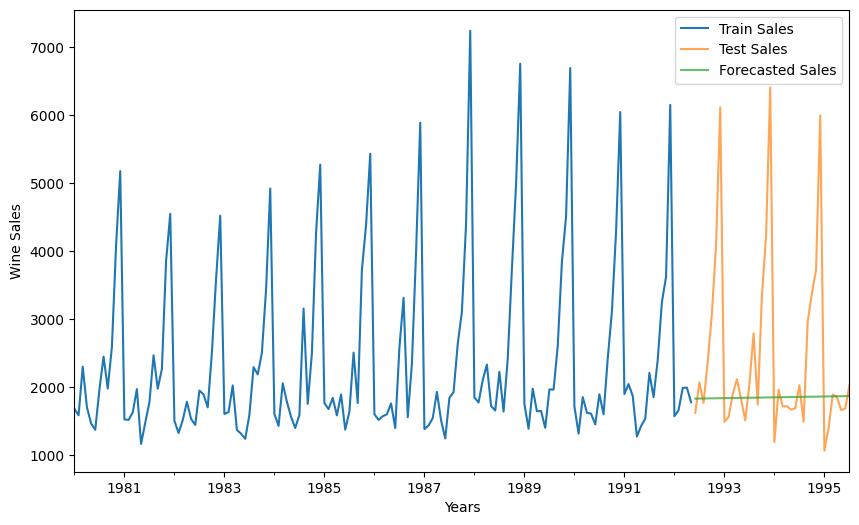

In [ ]:
#plotting the forecasted values against the test values
axis = train['Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
#compute the RMSE
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1460.245


In [ ]:
#add the RMSE to the results dataframe
resultsDf4 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best Double Exponential Smoothing : ARIMA(0,2,2)'])

resultsDf4
pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467


### **6. Triple Exponential Smoothing Model**

The Triple Exponential Smoothing (TES) model, almost universally known as the Holt-Winters method, is a sophisticated time series forecasting technique designed to handle data that exhibits three key components: level, trend, and seasonality.


Key Components and Smoothing Parameters

The Holt-Winters method uses three separate smoothing equations, each controlled by its own smoothing parameter:


*   Component	Description	Smoothing Parameter
Level (Lt​)	The smoothed average value of the series at time t.	Alpha (α)
*   Trend (Tt​)	The estimated rate of change (slope) in the series at time t.	Beta (β)
*   Seasonality (St​)	The repeating pattern or fluctuation that occurs at fixed intervals (e.g., monthly, quarterly, weekly).	Gamma (γ)

The Multiplicative Holt–Winters model is approximately equivalent to a Seasonal ARIMA model on log-transformed data, since:

log⁡(Yt)=log⁡(Lt)+log⁡(Tt)+log⁡(St)

Therefore, we can use a SARIMA(0,1,1)(0,1,1)_m model on the log-transformed series to mimic multiplicative Holt–Winters.


In [ ]:
#Create a dataframe to store the results of the model
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC


,param,AIC


In [ ]:
#Building Triple Exponential Smoothing (TES) model which is equivalent to an SARIMA(0,1,1)(0,1,1) model
import statsmodels.api as sm

best_model = sm.tsa.statespace.SARIMAX(sales_wn_log, order=(0,1,1), seasonal_order=(0,1,1,12))
best_results = best_model.fit()

In [ ]:
#print result tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                         Wine-Sales   No. Observations:                  149
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 169.541
Date:                            Thu, 30 Oct 2025   AIC                           -333.081
Time:                                    17:53:40   BIC                           -324.343
Sample:                                01-01-1980   HQIC                          -329.530
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9231      0.038    -24.533      0.000      -0.997      -0.849
ma.S.L12      -0.6827      0.065   

In [ ]:
#do the predictions
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
#Generate the forecast values against the test values
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [ ]:
##Extracting the forecasts values for the test period
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
#display the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1496.297593
1992-07-01,2079.460066
1992-08-01,1941.105963
1992-09-01,2390.018654
1992-10-01,3306.048191
1992-11-01,4206.265346
1992-12-01,6324.348888
1993-01-01,1728.770975
1993-02-01,1668.394536
1993-03-01,1944.568068


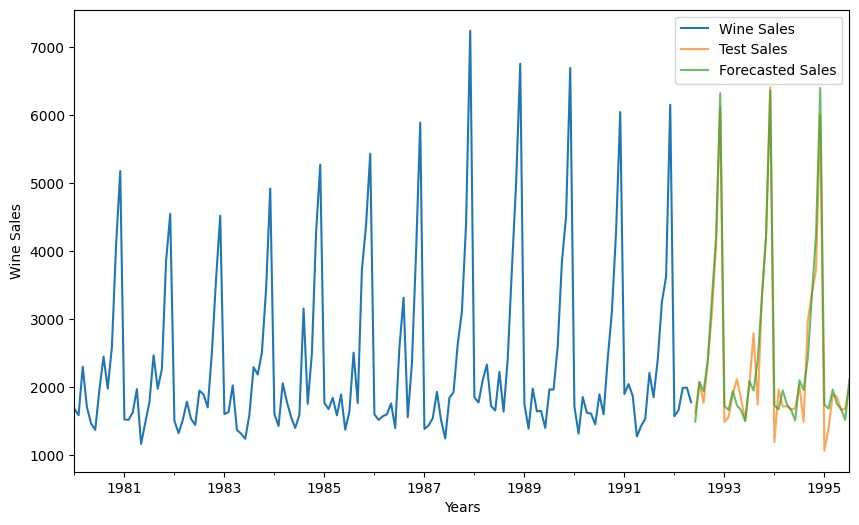

In [ ]:
#plotting the forecasted values against the test values
axis = train['Wine-Sales'].plot(label='Wine Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
#calculate the RMSE of the forecasted values against the test values
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 306.015


In [ ]:
#add the RMSE to the resultsDf
resultsDf5 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m'])

resultsDf5
pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4,resultsDf5])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399


### **7. Automated ARIMA Model**

An Automated ARIMA model (often called Auto ARIMA) is a forecasting method that automatically selects the best ARIMA configuration — that is, the best combination of parameters

(p,d,q) and possibly (P,D,Q,m)
(p,d,q) and possibly (P,D,Q,m)

ARIMA has the following Parameters:


*   p	- Autoregressive order	- Number of past values used
*   d	- Differencing order	- Times data is differenced to make it stationary
*   q	- Moving average order	Number of past errors used
*   P, D, Q	- Seasonal counterparts	- Apply to seasonal components
*   m	- Seasonal period	e.g., 12 for monthly data

The An Auto ARIMA algorithm performs these steps:

*   Tests for stationarity using unit root tests (like Augmented Dickey-Fuller)→ determines d (and D for seasonality)
*   Iterates over candidate (p, q, P, Q) values
→ fits multiple models
*   Evaluates each model using an information criterion such as:
      *   AIC (Akaike Information Criterion)
      *   BIC (Bayesian Information Criterion)
      *   AICc (AIC corrected for small samples)
*   Selects the model with the lowest AIC/BIC — i.e., best tradeoff between accuracy and complexity.
*   Optionally performs stepwise search (faster) instead of exhaustive search (slower but thorough).

ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
#create an empty data frame to store results of the model
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(sales_wn_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(1, 0, 1) - AIC:-110.17956773512739
ARIMA(1, 0, 2) - AIC:-109.01723553186599
ARIMA(1, 0, 3) - AIC:-117.18814782875191
ARIMA(1, 1, 1) - AIC:-101.84584082762512
ARIMA(1, 1, 2) - AIC:-104.4165297596561
ARIMA(1, 1, 3) - AIC:-103.24594971634068
ARIMA(2, 0, 1) - AIC:-124.10922584705989
ARIMA(2, 0, 2) - AIC:-108.36584062911285
ARIMA(2, 0, 3) - AIC:-155.61251903417389
ARIMA(2, 1, 1) - AIC:-105.32001302017213
ARIMA(2, 1, 2) - AIC:-99.88813574477734
ARIMA(2, 1, 3) - AIC:-108.0315329024396
ARIMA(3, 0, 1) - AIC:-122.441961143258
ARIMA(3, 0, 2) - AIC:-120.13291709482752
ARIMA(3, 0, 3) - AIC:-156.2462413513506
ARIMA(3, 1, 1) - AIC:-72.0588919844628
ARIMA(3, 1, 2) - AIC:-105.31361826720436
ARIMA(3, 1, 3) - AIC:-113.99460667273038


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-156.246241
8,"(2, 0, 3)",-155.612519
6,"(2, 0, 1)",-124.109226
12,"(3, 0, 1)",-122.441961
13,"(3, 0, 2)",-120.132917


Building ARIMA model with best parameters p,d,q

In [ ]:
#Building ARIMA model with best parameters p,d,q
best_model = ARIMA(sales_wn_log,order = (3, 0, 3))
best_results = best_model.fit()

In [ ]:
#Print the results summary tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Wine-Sales   No. Observations:                  149
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  86.123
Date:                Thu, 30 Oct 2025   AIC                           -156.246
Time:                        17:53:50   BIC                           -132.215
Sample:                    01-01-1980   HQIC                          -146.483
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3345      0.008    393.199      0.000       3.318       3.351
ar.L1          0.7497      0.076      9.847      0.000       0.600       0.899
ar.L2          0.7141      0.128      5.580      0.0

In [ ]:
#Generate the predictions
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)


In [ ]:
#conduct the forecasting
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)


In [ ]:
#extraxt the forecasted values for the test period
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
#display the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1331.139608
1992-07-01,1611.321531
1992-08-01,1840.074634
1992-09-01,2502.968644
1992-10-01,2871.361357
1992-11-01,3478.761816
1992-12-01,3272.463039
1993-01-01,3131.450584
1993-02-01,2400.836502
1993-03-01,2024.659280


The values are a bit off compared with those of Triple Exponential smoothing model. RMSE is expected to be bigger than that of TES model

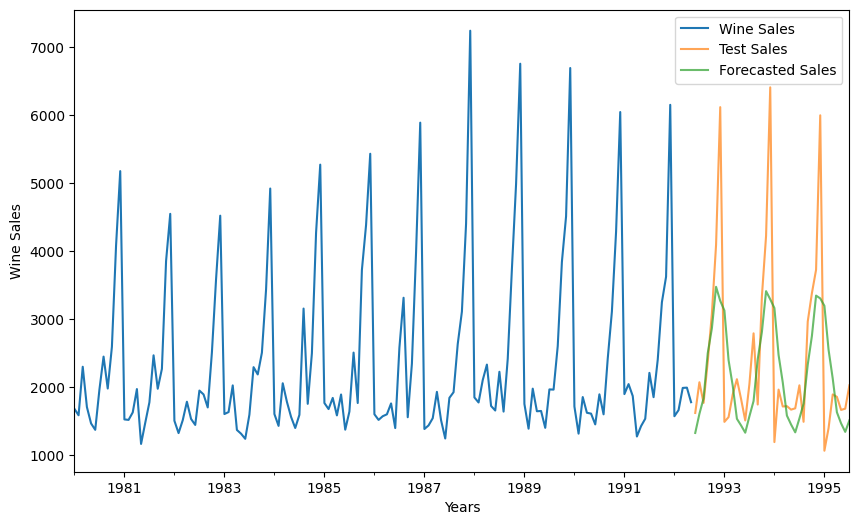

In [ ]:
#Plot the forecasted values for the test period
axis = train['Wine-Sales'].plot(label='Wine Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
#Calculate the RMSE
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1080.995


In [ ]:
#add the RMSE to the results dataframe
resultsDf6 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA : ARIMA(3,0,3)'])

resultsDf6
pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4,resultsDf5,resultsDf6])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399
"Best ARIMA : ARIMA(3,0,3)",1080.994757


## **8. Automated SARIMA Model**

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**

Finding Seasonality = 12 from ACF/PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

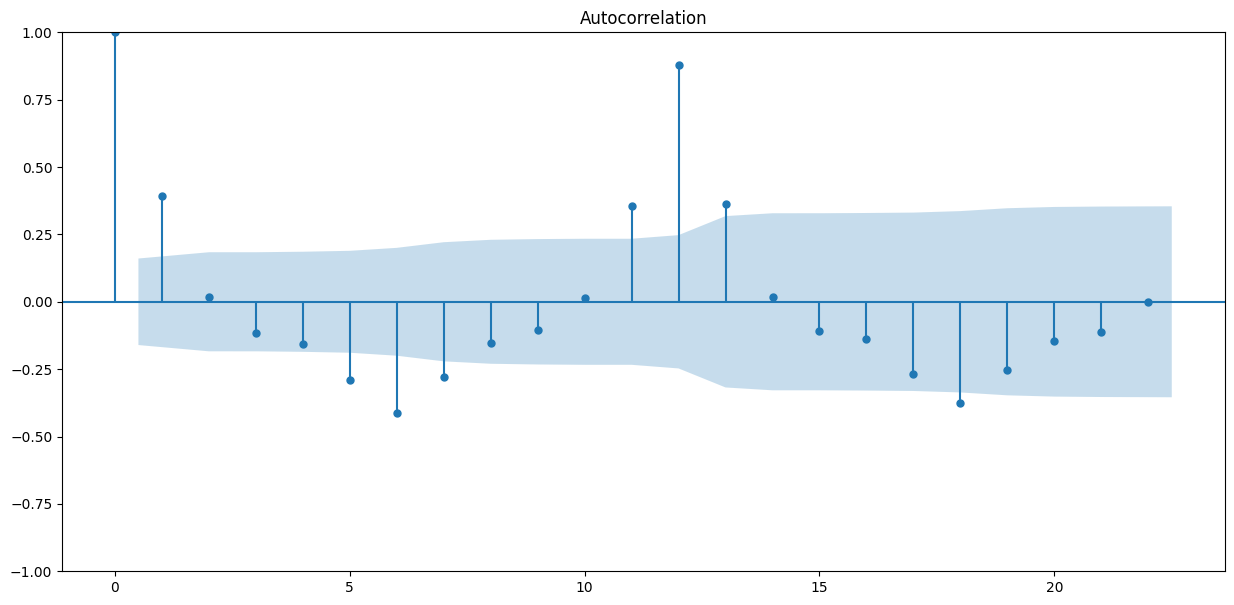

In [ ]:
plot_acf(train['Wine-Sales'],alpha=0.05);

SARIMA Model - Estimating best parameters

In [ ]:
#setting up the variables needed to systematically test different combinations of model parameters and keep track of the one that yields the lowest AIC
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
#Creating empty dataframe to store parameters
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
#Importing libraries and searching the optimum parameters
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sales_wn_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame([{'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}])], ignore_index=True)
        #SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': SARIMA_model.aic}])], ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-334.4346263211962
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-299.8065783854097
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:-263.8598804135679
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-297.1100123326684
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-265.0100845155439
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3906.7309726853077
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-300.67218454448533
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-297.4483136842937
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:-263.4993594966083
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-264.665693084958
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-261.1170221625216
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3787.7456448589883
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:-265.0468180955412
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-264.89443762986934
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:-266.3612280187318
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-232.37186655629483
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:-232.7462568822339
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:3908.3690042994263
SARIMA(1

KeyboardInterrupt: 

In [ ]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-334.434626
108,"(2, 0, 1)","(1, 0, 1, 12)",-333.501668
18,"(1, 0, 2)","(1, 0, 1, 12)",-332.619071
126,"(2, 0, 2)","(1, 0, 1, 12)",-331.563268
36,"(1, 0, 3)","(1, 0, 1, 12)",-326.871092


For ARIMA(p, d, q) × (P, D, Q)S, we got SARIMAX(1, 0, 1) 	(1, 0, 1, 12) model with the least AIC of  	-334.434626

Building SARIMA model with the best parameters

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(sales_wn_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [ ]:
#Print result tables
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                         Wine-Sales   No. Observations:                  149
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 171.564
Date:                            Thu, 30 Oct 2025   AIC                           -333.129
Time:                                    18:19:43   BIC                           -318.109
Sample:                                01-01-1980   HQIC                          -327.026
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.003    377.404      0.000       0.993       1.004
ma.L1         -0.9303      0.037   

In [ ]:
#Execute the prediction
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)


In [ ]:
#conduct the forecasting
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [ ]:
#Extract forecasted values for the test period
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_wn_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
#Dispay the forecasted values
testCopy1['sales_wn_forecasted']

,sales_wn_forecasted
1992-06-01,1500.705603
1992-07-01,2071.737621
1992-08-01,1950.971523
1992-09-01,2369.916393
1992-10-01,3262.338970
1992-11-01,4149.179123
1992-12-01,6171.185198
1993-01-01,1729.129375
1993-02-01,1666.075343
1993-03-01,1938.290854


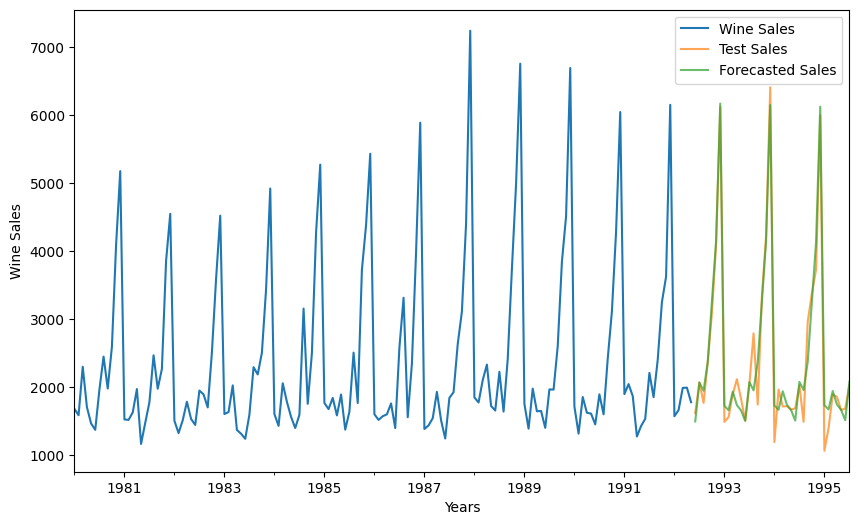

In [ ]:
#Plot the train values and  forecasted values for the test period
axis = train['Wine-Sales'].plot(label='Wine Sales', figsize=(10, 6))
testCopy1['Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_wn_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
#compute the RMSE
mse = ((testCopy1['Wine-Sales'] - testCopy1['sales_wn_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 294.489


In [ ]:
#concatenate the results to the resultDf
resultsDf7 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA : SARIMAX(1, 0, 1) 	(1, 0, 1, 12)'])

resultsDf7
pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4,resultsDf5,resultsDf6,resultsDf7])

,RMSE
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399
"Best ARIMA : ARIMA(3,0,3)",1080.994757
"Best SARIMA : SARIMAX(1, 0, 1) \t(1, 0, 1, 12)",294.489072


In [ ]:
#put the data above to a dataframe
resultsDf = pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4,resultsDf5,resultsDf6,resultsDf7])

In [ ]:
#arrange the resultDf in asceding order using the RMSE
resultsDf.sort_values(by=['RMSE'],ascending=True)

,RMSE
"Best SARIMA : SARIMAX(1, 0, 1) \t(1, 0, 1, 12)",294.489072
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399
"Best ARIMA : ARIMA(3,0,3)",1080.994757
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467
"Best Simple Exponential Smoothing : ARIMA(0,1,1)",1466.086956
"Best Naive Forecast : ARIMA(0,1,0)",1490.207448


## Model Comparison and Final Model Selection

In [ ]:
#add the data to Model_results dataframe
Model_resultsDf = pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3,resultsDf4,resultsDf5,resultsDf6,resultsDf7])

In [ ]:
#arrange the Model_resultsDf in asceding order using the RMSE
Model_resultsDf.sort_values(by=['RMSE'],ascending=True)

,RMSE
"Best SARIMA : SARIMAX(1, 0, 1) \t(1, 0, 1, 12)",294.489072
"Best SARIMA : SARIMAX(1, 0, 1) \t(1, 0, 1, 12)",294.489072
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399
"Best Triple Exponential Smoothing : SARIMA(0,1,1)(0,1,1)_m",306.015399
"Best ARIMA : ARIMA(3,0,3)",1080.994757
"Best ARIMA : ARIMA(3,0,3)",1080.994757
"Best AR Model : ARIMA(2,0,0)",1363.230715
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Simple Average : ARIMA(0,0,0)",1364.220460
"Best Double Exponential Smoothing : ARIMA(0,2,2)",1460.245467


The chosen model is: SARIMAX(1, 0, 1) \t(1, 0, 1, 12)


Key Reasons for Selection: The reasons for selecting this model were:

*   **Lowest Error:** The RMSE of 294.49 for the SARIMAX model is significantly lower than all other models. RMSE measures the average magnitude of the error; a lower value indicates better forecast accuracy.
*   **Addressing Seasonality:** The huge improvement in RMSE compared to the Best ARIMA (RMSE ≈1081) and other non-seasonal models indicates that the data has a strong seasonal component that the standard ARIMA model could not capture. SARIMA is specifically designed to model these recurring patterns (like yearly cycles captured by the seasonal period of 12).

Understanding the SARIMAX Order:

The selected SARIMAX model parameters are broken down as follows:
SARIMAX(p,d,q)(P,D,Q,s)

    Non-Seasonal Order (p,d,q): (1, 0, 1)

        p=1: One non-seasonal AutoRegressive term.

        d=0: No non-seasonal differencing is required (the series is likely already stationary or the seasonal differencing handled it).

        q=1: One non-seasonal Moving Average term.

    Seasonal Order (P,D,Q,s): (1, 0, 1, 12)

        P=1: One seasonal AutoRegressive term.

        D=0: No seasonal differencing is required.

        Q=1: One seasonal Moving Average term.

        s=12: A seasonal period of 12, likely indicating monthly data with an annual pattern.

## Forecasting using Final Model

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 48
pred_uc_99 = best_results.get_forecast(steps=48, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=48, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 48
idx = pd.date_range(start='1992-06-01',end='1996-05-30',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1992-06-01,1500.705603,1111.632198,2025.955447,1111.632198,2025.955447
1992-07-01,2071.737621,1533.543945,2798.809114,1533.543945,2798.809114
1992-08-01,1950.971523,1443.144353,2637.497680,1443.144353,2637.497680
1992-09-01,2369.916393,1751.825076,3206.087061,1751.825076,3206.087061
1992-10-01,3262.338970,2409.834145,4416.426573,2409.834145,4416.426573


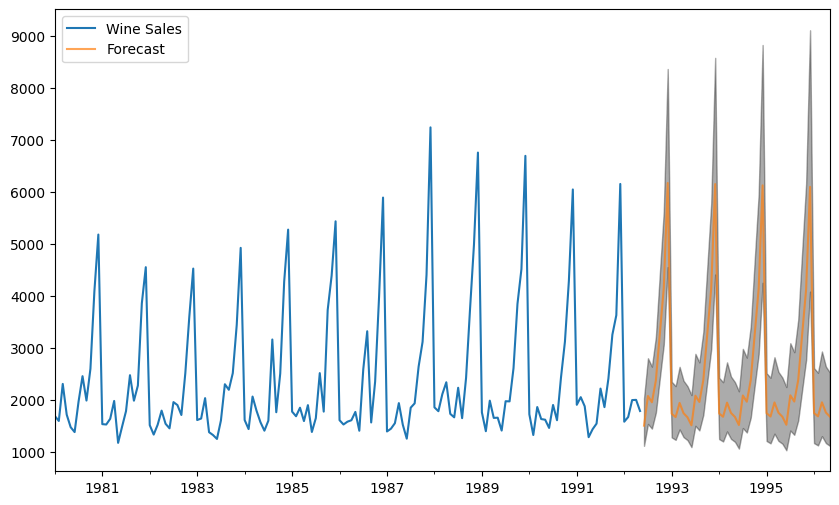

In [ ]:
# plot the forecast along with the confidence band
ax = train['Wine-Sales'].plot(label='Wine Sales', figsize=(10, 6))
fc_all['forecast'].plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
ax.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()
plt.close()

Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

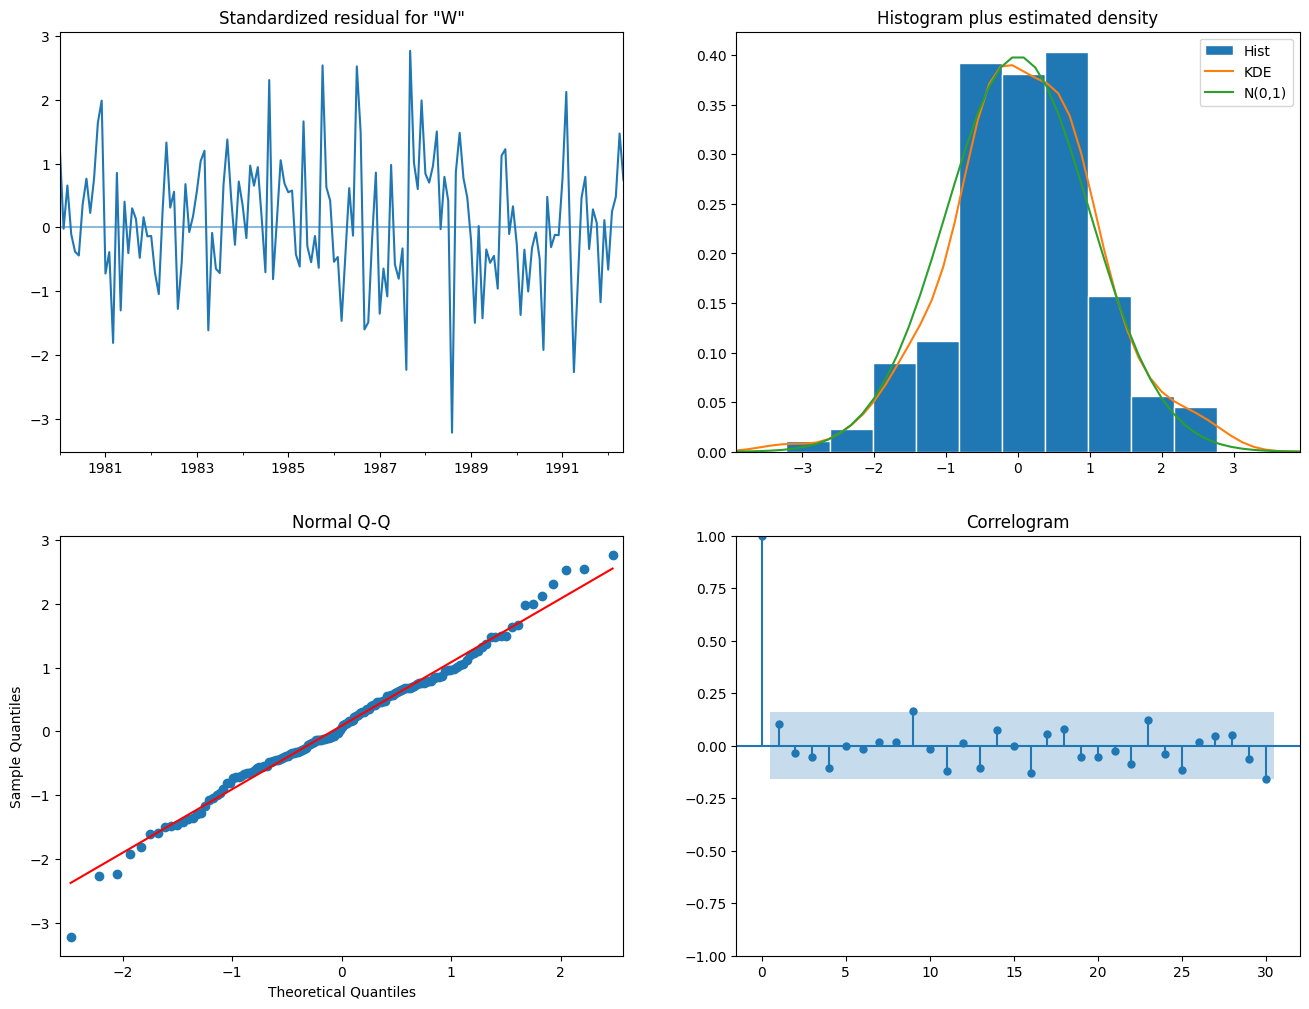

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

## Business Insights and Recommendations

1. The SARIMAX model was identified as the best-performing model, recording the lowest RMSE of 294.49, which is significantly lower than that of all other models. This demonstrates its superior accuracy and reliability for forecasting and prediction tasks using this dataset.

2. The business is encouraged to leverage the identified seasonal patterns by developing targeted marketing campaigns during peak sales periods, such as holidays and festive seasons.

3. It is recommended that the business align inventory management with forecasted seasonal demand to prevent stockouts during high-demand months and minimize holding costs during off-peak periods.

4. The business should also enhance its digital marketing strategy, with a focus on social media engagement, to attract younger demographics and expand customer reach beyond traditional sales channels.

# Conclusion


The analysis of the Sparkling Wine dataset reveals distinct seasonal trends and periodic fluctuations in sales volumes. Peaks in sales consistently occur during specific times of the year, likely corresponding to holidays and celebratory events. The time series decomposition confirms a strong seasonal component, emphasizing the importance of aligning marketing and inventory strategies with periods of high demand.

The SARIMAX model was identified as the best-performing forecasting model, achieving the lowest RMSE of 294.49, which is significantly lower than that of all other models tested. This demonstrates its superior accuracy and reliability for forecasting and prediction tasks within this dataset. Forecast results indicate continued growth with sustained seasonal patterns, presenting opportunities to optimize both marketing initiatives and supply chain operations.

Based on these insights, the following recommendations are proposed:

Leverage Seasonal Patterns: Develop targeted marketing campaigns during peak sales periods, such as holidays and festive seasons, to maximize sales performance.

Optimize Inventory Management: Align inventory planning with forecasted seasonal demand to avoid stockouts during high-demand months and reduce holding costs during off-peak periods.

Enhance Digital Marketing: Strengthen digital marketing and social media strategies to attract younger demographics and expand customer reach beyond traditional sales channels.

By implementing these strategies, the business can effectively capitalize on seasonal demand patterns, improve operational efficiency, and sustain long-term growth.

__________